<a href="https://colab.research.google.com/github/mnaR99/narco_aguacate/blob/main/notebooks/expprod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

sns.set_context("paper", font_scale=0.8)

# Producción mensual de aguacate (2018 a 2020)







In [2]:
asc = pd.read_csv("https://raw.githubusercontent.com/mnaR99/narco_aguacate/main/data/processed/asc_entidad.csv")
asc.dtypes

entidad                 object
sembrada               float64
cosechada              float64
siniestrada            float64
produccion             float64
rendimiento_udm_ha_    float64
anio                     int64
mes                      int64
dtype: object

En esta primer instancia sólo nos interesa conocer la proporción de la producción de aguacate que se exporta, por lo que se filtra esta base al `Total` nacional.

In [3]:
prod = asc[asc.entidad == "Total"].reset_index(drop=True)
prod.head()

,entidad,sembrada,cosechada,siniestrada,produccion,rendimiento_udm_ha_,anio,mes
0,Total,231028.04,150742.03,0.0,183809.67,1.22,2018,1
1,Total,231028.04,155620.44,0.0,381600.48,2.45,2018,2
2,Total,231028.04,158124.14,0.0,564061.31,3.57,2018,3
3,Total,231028.04,167504.95,0.0,738169.11,4.41,2018,4
4,Total,231028.04,170970.89,0.0,893429.57,5.23,2018,5


Para efectos de visualización se crea una variable de tipo fecha para que los datos sean presentados de manera correcta.

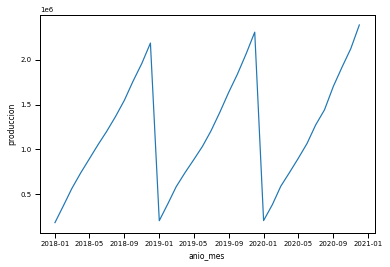

In [4]:
prod["anio_mes"] = pd.to_datetime(prod["anio"].astype(str) + "-" + prod["mes"].astype(str))
sns.lineplot(data=prod, x="anio_mes", y="produccion")

A partir de este gráfico nos podemos dar cuenta de que la variable de producción tiene lo que se va acumulando hasta el fin de año, por lo que se procede a calcular la producción mensual (en kg dado que las exportaciones así lo están) con diferencias.

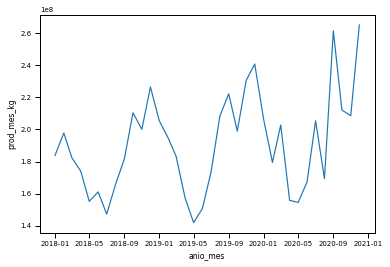

In [5]:
prod["prod_mes_kg"] = prod.groupby('anio')['produccion'].transform(lambda x: (x - x.shift(fill_value = 0)) * 1000)
sns.lineplot(data=prod, x="anio_mes", y="prod_mes_kg")

# Exportaciones mensuales (2003 a 2020)

In [6]:
exportaciones = pd.read_csv("https://raw.githubusercontent.com/mnaR99/narco_aguacate/main/data/processed/exportaciones_mensuales.csv")
exportaciones

,tipo,pais,anio,mes,unidades
0,USD,Total,2003,enero,16325868
1,USD,Estados Unidos de America,2003,enero,7368585
2,USD,El Salvador (República de ),2003,enero,1674407
3,USD,Japon,2003,enero,2290553
4,USD,Francia,2003,enero,1716184
...,...,...,...,...,...
11635,Kg,Belice,2020,diciembre,0
11636,Kg,Bulgaria (República de),2020,diciembre,0
11637,Kg,Irlanda (República de),2020,diciembre,0
11638,Kg,Suecia (Reino de),2020,diciembre,0


De esta prevsiualización de los datos se observa lo siguiente:

* Sólo nos interesa la información por Kg
* Nos interesa el total de lo que se exporta
* Los meses tienen formato textual, por lo que deben ser transformados

In [10]:
expKg = exportaciones[(exportaciones.tipo == "Kg") & (exportaciones.pais == "Total")].reset_index(drop=True)

mes_num = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, 
           "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, 
           "noviembre": 11, "diciembre": 12}

expKg.mes = expKg.mes.map(mes_num)

expKg.head()

,tipo,pais,anio,mes,unidades
0,Kg,Total,2003,1,11361990
1,Kg,Total,2003,2,12729014
2,Kg,Total,2003,3,14634592
3,Kg,Total,2003,4,11381261
4,Kg,Total,2003,5,4510600


Unimos las bases por año y mes, para poder comparar las exportaciones y producciones mensuales.

In [16]:
expprod = expKg.merge(prod, on=["anio","mes"])
expprod.head()

,tipo,pais,anio,mes,unidades,entidad,sembrada,cosechada,siniestrada,produccion,rendimiento_udm_ha_,anio_mes,prod_mes_kg
0,Kg,Total,2018,1,132895571,Total,231028.04,150742.03,0.0,183809.67,1.22,2018-01-01,183809670.0
1,Kg,Total,2018,2,101633108,Total,231028.04,155620.44,0.0,381600.48,2.45,2018-02-01,197790810.0
2,Kg,Total,2018,3,116491762,Total,231028.04,158124.14,0.0,564061.31,3.57,2018-03-01,182460830.0
3,Kg,Total,2018,4,109410096,Total,231028.04,167504.95,0.0,738169.11,4.41,2018-04-01,174107800.0
4,Kg,Total,2018,5,99170739,Total,231028.04,170970.89,0.0,893429.57,5.23,2018-05-01,155260460.0


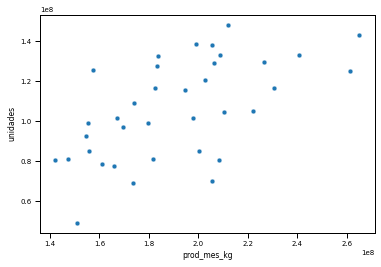

In [17]:
sns.scatterplot(data=expprod, x="prod_mes_kg", y="unidades")

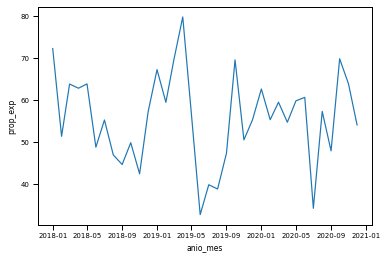

In [12]:
expprod["prop_exp"] = expprod.unidades / expprod.prod_mes_kg * 100
sns.lineplot(data=expprod, x="anio_mes", y="prop_exp")

La serie muestra un comportamiento a primera vista estacionario, por lo que usar esta serie para poder pronosticar datos anteriores o futuros puede ser útil.